#### DSC550
##### Week 7 assignment, Author: Xin Tang, 4/25/24

###### Part 1: PCA and Variance Threshold in a Linear Regression

In [1]:
# Import the housing data as a data frame and ensure that the data is loaded properly.

# load package first
import numpy as np 
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# load the data frame

trainset = pd.read_csv('train.csv')
testset = pd.read_csv('test.csv')

In [10]:
#check data loaded correct
trainset.head()
#testset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
# Drop the "Id" column and any features that are missing more than 40% of their values.
#trainset.drop(columns = ['Id'])
#testset.drop(columns = ['Id'])
trainset = trainset.drop(['Id'], axis=1)
testset = testset.drop(['Id'], axis=1)

#check shape of the dataset to know how much is 40%
print('trainset shape:', trainset.shape)
print('testset shape:',testset.shape)
trainset.head()

trainset shape: (1460, 80)
testset shape: (1459, 79)


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
# so 40% of trainset column length is 584, 40% of testset column length is 584

In [4]:
# define function to count empty values in each column
def count_empty_values_in_each_column(df: pd.DataFrame):
  print('empty values')
  print('------------\n')

  empty_columns = []
  for col in df.columns:
    empty = df[col].isna().sum()
    if empty != 0:
      empty_columns.append(col)
      print(f"{col}: {empty}")
  
 # return empty_columns

In [4]:
# check empty values in trainset
count_empty_values_in_each_column(trainset)

empty values
------------

LotFrontage: 259
Alley: 1369
MasVnrType: 8
MasVnrArea: 8
BsmtQual: 37
BsmtCond: 37
BsmtExposure: 38
BsmtFinType1: 37
BsmtFinType2: 38
Electrical: 1
FireplaceQu: 690
GarageType: 81
GarageYrBlt: 81
GarageFinish: 81
GarageQual: 81
GarageCond: 81
PoolQC: 1453
Fence: 1179
MiscFeature: 1406


In [5]:
#remove fireplaceQu, poolQC and Fence from the testset
newtrain = trainset.drop(columns = ['Alley','FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'])
newtrain.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [6]:
# check empty values in testset
count_empty_values_in_each_column(testset)

empty values
------------

MSZoning: 4
LotFrontage: 227
Alley: 1352
Utilities: 2
Exterior1st: 1
Exterior2nd: 1
MasVnrType: 16
MasVnrArea: 15
BsmtQual: 44
BsmtCond: 45
BsmtExposure: 44
BsmtFinType1: 42
BsmtFinSF1: 1
BsmtFinType2: 42
BsmtFinSF2: 1
BsmtUnfSF: 1
TotalBsmtSF: 1
BsmtFullBath: 2
BsmtHalfBath: 2
KitchenQual: 1
Functional: 2
FireplaceQu: 730
GarageType: 76
GarageYrBlt: 78
GarageFinish: 78
GarageCars: 1
GarageArea: 1
GarageQual: 78
GarageCond: 78
PoolQC: 1456
Fence: 1169
MiscFeature: 1408
SaleType: 1


In [6]:
#remove fireplaceQu, poolQC and Fence from the testset
newtest = testset.drop(columns = ['Alley','FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'])
newtest.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,120,0,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,36,0,0,0,0,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,34,0,0,0,0,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,36,0,0,0,0,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,Gtl,...,82,0,0,144,0,0,1,2010,WD,Normal


In [7]:
# For numerical columns, fill in any missing data with the median value.

newtrain.fillna(newtrain.median(numeric_only=True).round(1), inplace=True)
newtest.fillna(newtest.median(numeric_only=True).round(1), inplace=True)

In [8]:
#For categorical columns, fill in any missing data with the most common value (mode).

train_cat_columns = newtrain.select_dtypes(include=['object']).columns
newtrain[train_cat_columns] = newtrain[train_cat_columns].fillna(newtrain[train_cat_columns].mode().iloc[0])

test_cat_columns = newtest.select_dtypes(include=['object']).columns
newtest[test_cat_columns] = newtest[test_cat_columns].fillna(newtest[test_cat_columns].mode().iloc[0])

#check result
#newtrain.to_csv('newtrain.csv')
#newtest.to_csv('newtest.csv')

In [ ]:
# No use
#string_columns = df.select_dtypes(include=['object']).columns
#df[string_columns] = df[string_columns].fillna(df[string_columns].mode().iloc[0])

#newtrain.fillna(newtrain.mode(numeric_only=False), inplace=True)
#newtest.fillna(newtest.mode(numeric_only=False), inplace=True)

In [9]:
#Convert the categorical columns to dummy variables.
# use trainset only

cat = newtrain.select_dtypes(exclude=np.number)
#print(cat.keys())

newdf = pd.get_dummies(newtrain, columns=cat.keys(), drop_first=True)

In [16]:
#validate the result
#newdf.to_csv('newdf.csv')
newdf.shape

(1460, 233)

In [37]:
# Split the data into a training and test set, where the SalePrice column is the target.

X = newdf.drop(columns=['SalePrice'])
y = newdf.SalePrice

#now split it into train and test dataset, 20% are testset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
#Run a linear regression and report the R2-value and RMSE on the test set.

regression = LinearRegression()

#fit the regression
model = regression.fit(X_train, y_train)

#Calculate R2, RMSE, and MAE on test sets
test_predicted = model.predict(X_test)

import sklearn.metrics as metrics
test_r2 = metrics.r2_score(y_test, test_predicted)
test_mae = metrics.mean_absolute_error(y_test, test_predicted)
test_mse = metrics.mean_squared_error(y_test, test_predicted)
test_rmse = np.sqrt(train_mse)

print('train dataset R2 value is:', test_r2)
print('train datasetRSME value is:', test_rmse)
print('train dataset MAE value is:', test_mae)

train dataset R2 value is: 0.6483838610509479
train datasetRSME value is: 19865.011484616505
train dataset MAE value is: 20441.025186366172


In [49]:
# Fit and transform the training features with a PCA so that 90% of the variance is retained 
# Transform but DO NOT fit the test features with the same PCA.

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print('X_train after scale:',X_train_scaled.shape)
print('X_test after scale:',X_test_scaled.shape)


#standardize the feature
#features = StandardScaler().fit_transform(X_train)

#create PCA retain 90% of variance
pca = PCA(n_components=0.90)

Train_pca = pca.fit_transform(X_train_scaled)
Test_pca = pca.transform(X_test_scaled)

print('X_train after pca:',Train_pca.shape)
print('X_test after pca:',Test_pca.shape)


X_train after scale: (1168, 232)
X_test after scale: (292, 232)
X_train after pca: (1168, 128)
X_test after pca: (292, 128)


###### After PCA reduction, only 128 features left. 

In [57]:
#Take your original training features (from step 6) and apply a min-max scaler to them.
# Transform but DO NOT fit the test features, 

# Min-Max scaler
from sklearn.preprocessing import MinMaxScaler
MMscaler = MinMaxScaler()

X_train_mm = MMscaler.fit_transform(X_train)
X_test_mm = MMscaler.transform(X_test)
print(X_train_mm.shape)
print(X_test_mm.shape)

(1168, 232)
(292, 232)


In [58]:
# Find the min-max scaled features in your training set that have a variance above 0.1
# Find features in test set that have a variance above 0.1

from sklearn.feature_selection import VarianceThreshold
# Create thresholder
thresholder = VarianceThreshold(threshold=.1)
X_train_highV = thresholder.fit_transform(X_train_mm)
X_test_highV = thresholder.transform(X_test_mm)
print("high variance Training features:", X_train_highV.shape[1])
print("high variance test features:", X_test_highV.shape[1])

high variance Training features: 42
high variance test features: 42


In [64]:
#Run a linear regression and report the R2-value and RMSE on the PCA reduced test set.

regression = LinearRegression()

#fit the regression
model_PCA = regression.fit(Train_pca, y_train)

#Calculate R2, RMSE, and MAE on test sets
PCA_predicted = model_PCA.predict(Test_pca)

# now calculate the KPI
PCA_r2 = metrics.r2_score(y_test, PCA_predicted)
PCA_mae = metrics.mean_absolute_error(y_test, PCA_predicted)
PCA_mse = metrics.mean_squared_error(y_test, PCA_predicted)
PCA_rmse = np.sqrt(train_mse)

print('PCA dataset R2 value is:', PCA_r2)
print('PCA datasetRSME value is:', PCA_rmse)
print('PCA dataset MAE value is:', PCA_mae)

PCA dataset R2 value is: 0.8412333274670791
PCA datasetRSME value is: 19865.011484616505
PCA dataset MAE value is: 21995.811196127976


In [65]:
#Run a linear regression and report the R2-value and RMSE on the high variance test set.

regression = LinearRegression()

#fit the regression
model_highV = regression.fit(X_train_highV, y_train)

#Calculate R2, RMSE, and MAE on test sets
highV_predicted = model_highV.predict(X_test_highV)

# now calculate the KPI
PCA_r2 = metrics.r2_score(y_test, highV_predicted)
PCA_mae = metrics.mean_absolute_error(y_test, highV_predicted)
PCA_mse = metrics.mean_squared_error(y_test, highV_predicted)
PCA_rmse = np.sqrt(train_mse)

print('high Variance dataset R2 value is:', PCA_r2)
print('high Variance RSME value is:', PCA_rmse)
print('high Variance MAE value is:', PCA_mae)

high Variance dataset R2 value is: 0.654285826726551
high Variance RSME value is: 19865.011484616505
high Variance MAE value is: 34602.465024079575


##### Summary of findings of part 1
we exericed 3 methods in part 1. normal linear regression, linear regression with PCA reduced features and regression with high variance feature selections.

Among 3 methods, the PCA reduced features yield best model with R2 as 0.84, the regression with all features and with high variance features performs almost same with R2 as 0.64-0.65

The RSME and MAE are almost at same level for all 3 models. 

###### End of Part 1

#### Part 2: Categorical Feature Selection

In [2]:
# load mushroom dataset
df_mushroom = pd.read_csv('mushrooms.csv')
df_mushroom.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
# Convert the categorical features (all of them) to dummy variables

new_mushroom = pd.get_dummies(df_mushroom, columns=df_mushroom.columns[1:], drop_first=True)
new_mushroom

,class,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,p,0,0,0,0,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
1,e,0,0,0,0,1,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
2,e,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,1,0,0,0
3,p,0,0,0,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
4,e,0,0,0,0,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
8120,e,0,0,0,0,1,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0
8121,e,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
8122,p,0,0,1,0,0,0,0,1,0,...,0,0,1,0,0,1,0,0,0,0


In [4]:
# Split the data into a training and test set.
X = new_mushroom.drop(columns=['class'])
y = new_mushroom['class']

#now split it into train and test dataset, 20% are testset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# Fit a decision tree classifier on the training set

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

tree_model = DecisionTreeClassifier()

tree_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [6]:
# Report the accuracy and create a confusion matrix for the model prediction on the test set.

# make prediction
tree_pred = tree_model.predict(X_test)

# report accuracy
tree_report = classification_report(y_test, tree_pred)

print('Decision Tree')
print(tree_report)

Decision Tree
              precision    recall  f1-score   support

           e       1.00      1.00      1.00       843
           p       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



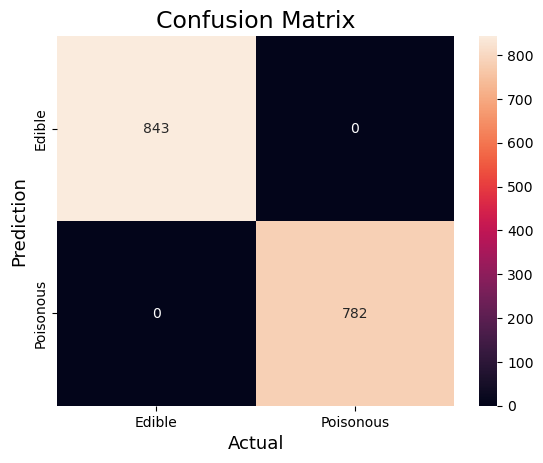

In [7]:
# Create a confusion matrix for the test set predictions.

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,tree_pred)

#visualize the confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(cm, 
            annot=True,
            fmt='g', 
            xticklabels=['Edible','Poisonous'],
            yticklabels=['Edible','Poisonous'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [14]:
#import sys
#!{sys.executable} -m pip install pydotplus


SyntaxError: invalid syntax (1235308962.py, line 3)

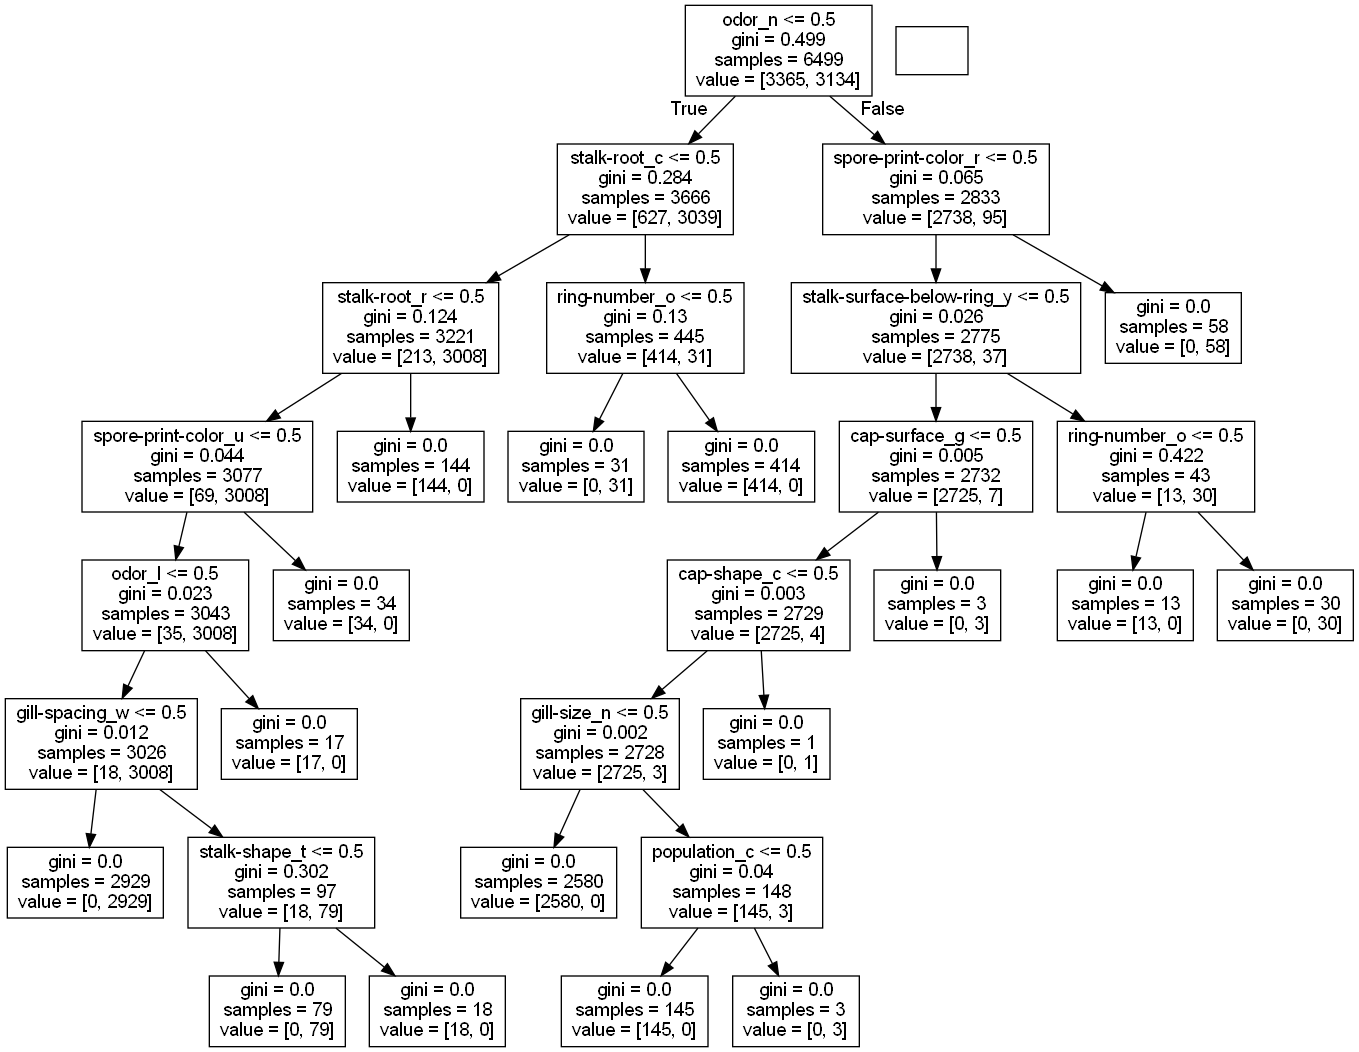

In [9]:
# Create a visualization of the decision tree.
from IPython.display import Image
from sklearn import tree
import pydotplus

names = list(X_train.columns.values)
# Create DOT data
dot_data = tree.export_graphviz(tree_model,
                                out_file=None,
                                feature_names=names,
                                )



# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)

# Show graph
Image(graph.create_png())

In [4]:
# Use a χ2-statistic selector to pick the five best features for this data 

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif

# convert features to integers
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()

X = df_mushroom.drop(columns=['class'])
y = df_mushroom['class']

#names
for i in X.columns:
    X[i] = enc.fit_transform(X[i])
    
y = enc.fit_transform(y)

In [5]:
# Select 5 features with highest chi-squared statistics
chi2_selector = SelectKBest(chi2, k=5)
features_kbest = chi2_selector.fit_transform(X, y)

print("Reduced number of features:", features_kbest.shape[1])

Reduced number of features: 5


In [6]:
# Which five features were selected
mask = chi2_selector.get_support(indices=True)
mask

array([ 3,  7,  8, 10, 18], dtype=int64)

In [7]:
newX =X.iloc[:,mask]
#newX.head()
newX.shape

(8124, 5)

In [8]:
#now split the new dataframe with selected features into train and test dataset, 20% are testset
X_newtrain, X_newtest, y_newtrain, y_newtest = train_test_split(newX, y, test_size=0.2, random_state=42)

In [85]:
tree_model = DecisionTreeClassifier()

tree_model.fit(X_newtrain, y_newtrain)

DecisionTreeClassifier()

In [86]:
# Report the accuracy for the newmodel prediction on the test set.

# make prediction
tree_pred2 = tree_model.predict(X_newtest)

# report accuracy
tree_report = classification_report(y_newtest, tree_pred2)

print('Decision Tree')
print(tree_report)

Decision Tree
              precision    recall  f1-score   support

           0       0.95      1.00      0.98       843
           1       1.00      0.95      0.97       782

    accuracy                           0.97      1625
   macro avg       0.98      0.97      0.97      1625
weighted avg       0.98      0.97      0.97      1625



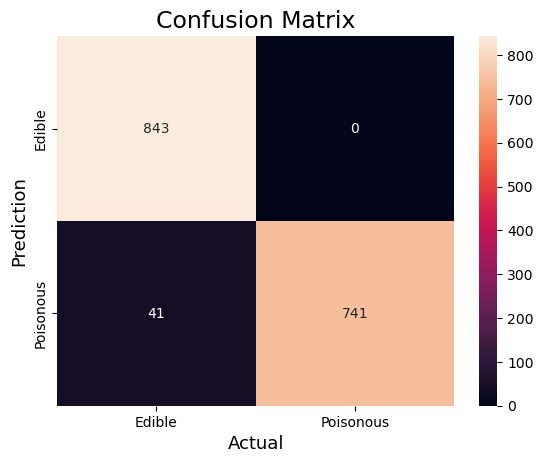

In [87]:
# Create a confusion matrix for the test set predictions.

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_newtest,tree_pred2)

#visualize the confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(cm, 
            annot=True,
            fmt='g', 
            xticklabels=['Edible','Poisonous'],
            yticklabels=['Edible','Poisonous'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

##### Summary of findings of part 2
we exericed 2 methods in part 2. normal Decision-Tree classifier, Decision-Tree classifier with only top 5 features selected by Chi-squared feature selection. 

Among 2 methods, the normal Decision-Tree performs very well, classified result 100% correct. Classification using only top 5 features classified 41 cases wrong, which is not bad from statistics aspect but fatal in real life, people will die following this result. 

For this dataset, I would pick normal Decision Tree classifier over the Chi-squared method. the reduced features method may save time in a very large dataset though. 

